In [1]:
%load_ext autoreload
%autoreload 2

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import empyrical as em
idx = pd.IndexSlice

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
tickers = sorted(["AMHIX", "MMHYX", "LHIAX", "VTEB", "MUB", "MUNI",
                  "SHYD", "ACTHX", "NHYMX", "SBI", "DMB", "MNP"])
dfs = yf.download(' '.join(tickers), period="max", group_by='ticker', actions=True)

[*********************100%***********************]  12 of 12 downloaded


# Get True Return

In [4]:
def get_returns_p1(ticker):
    df = dfs.loc[:, idx[ticker, :]]
    df.columns = df.columns.droplevel(0)
    df = df.dropna()
    df['Start'] = df['Close'].shift(1)
    df['End'] = df['Close'] + df['Dividends']
    return df['End'] / df['Start']

def get_prices(ticker):
    returns = get_returns_p1(ticker)
    prices = returns.cumprod()
    prices.iloc[0] = 1.
    return prices

df_returns = pd.DataFrame({t: get_returns_p1(t) - 1. for t in tickers})
df_prices = pd.DataFrame({t: get_prices(t) for t in tickers})


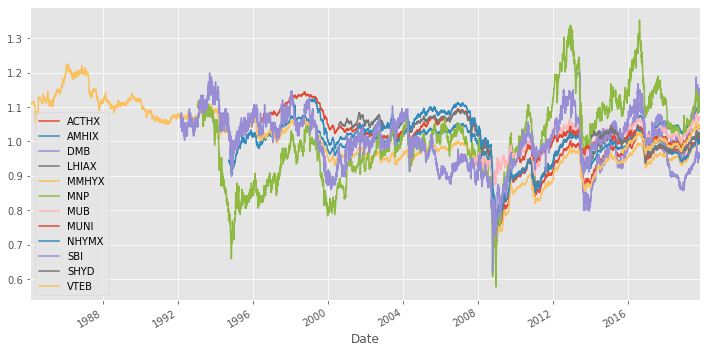

In [5]:
closes = dfs.loc[:, idx[:, 'Close']].copy()
closes /= closes.mean()
closes.columns = closes.columns.droplevel(1)
closes[tickers].plot()

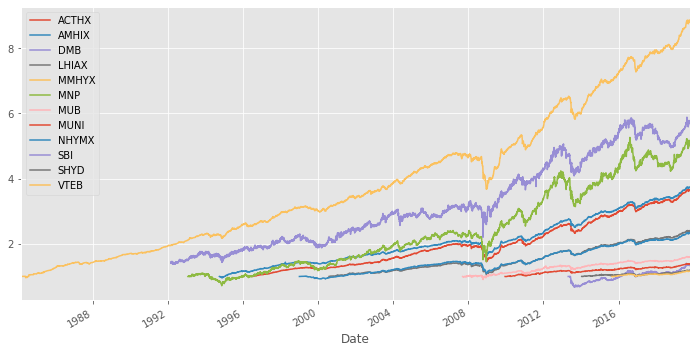

In [6]:
df_prices[tickers].plot()

# Calculate Length of Fund

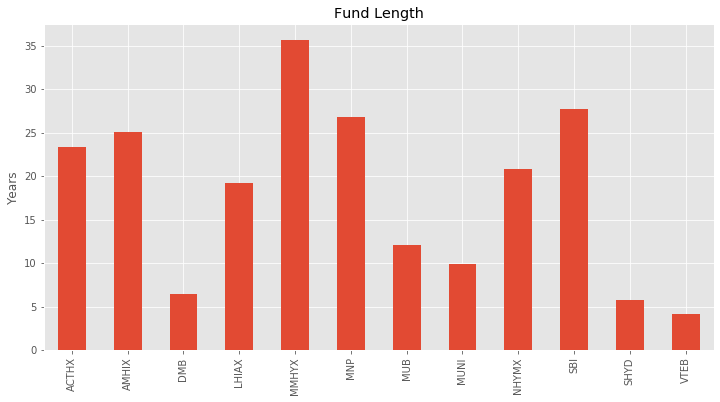

In [7]:
def get_length(df):
    df = df.dropna()
    return (df.index.max() - df.index.min()) / pd.Timedelta(days=365)

ax = df_prices.apply(get_length).plot.bar(title='Fund Length')
ax.set_ylabel('Years');


# Calculate Stats

In [8]:
def compute_stats(df):
    df = df.copy()
    return pd.DataFrame({
        'max_drawdown': df.apply(em.max_drawdown),
        'annual_return': em.annual_return(df),
        'annual_volatility': em.annual_volatility(df),
        'sharpe_ratio': em.sharpe_ratio(df),
        'calmar_ratio': df.apply(em.calmar_ratio),
    }).sort_values('calmar_ratio', ascending=False)


In [9]:
compute_stats(df_returns.last('1Y'))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
MMHYX,-0.012791,0.102625,0.020367,4.807687,8.023413
SHYD,-0.009874,0.075722,0.020881,3.506521,7.669074
AMHIX,-0.012674,0.093865,0.018207,4.937468,7.406414
ACTHX,-0.014409,0.100441,0.021695,4.423383,6.970621
LHIAX,-0.012797,0.088871,0.020611,4.141712,6.944624
DMB,-0.047389,0.290787,0.106815,2.444021,6.136206
NHYMX,-0.017699,0.099467,0.022879,4.156866,5.619859
MUNI,-0.014634,0.076987,0.020944,3.552249,5.260947
VTEB,-0.015665,0.080509,0.019181,4.046993,5.139466
MUB,-0.016832,0.077494,0.020462,3.658329,4.604055


In [10]:
compute_stats(df_returns.last('5Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
MMHYX,-0.060245,0.051541,0.023445,2.155575,0.855531
ACTHX,-0.067619,0.054327,0.026954,1.976377,0.803432
AMHIX,-0.061730,0.048836,0.022189,2.160185,0.791114
LHIAX,-0.059705,0.044900,0.023868,1.852278,0.752022
NHYMX,-0.070403,0.042172,0.023558,1.765288,0.599002
MUNI,-0.050820,0.029397,0.027749,1.058043,0.578455
DMB,-0.162630,0.087134,0.098472,0.897828,0.535780
MUB,-0.066963,0.030306,0.026248,1.150643,0.452576
SHYD,-0.079658,0.026022,0.047155,0.568371,0.326674
MNP,-0.196041,0.053437,0.091863,0.612643,0.272579


In [11]:
compute_stats(df_returns.last('10Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
AMHIX,-0.092634,0.062036,0.025587,2.365323,0.669689
LHIAX,-0.090500,0.060218,0.027211,2.162794,0.665390
NHYMX,-0.087231,0.055077,0.027034,1.996931,0.631390
ACTHX,-0.111183,0.065904,0.031444,2.045759,0.592749
MMHYX,-0.105609,0.062552,0.027947,2.185261,0.592299
MUNI,-0.062516,0.033719,0.028969,1.159324,0.539360
MUB,-0.097434,0.038392,0.040593,0.948466,0.394037
MNP,-0.257014,0.067737,0.102986,0.688032,0.263553
SBI,-0.192987,0.049982,0.117214,0.474792,0.258994


In [12]:
compute_stats(df_returns.last('15Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
MMHYX,-0.232974,0.051914,0.033719,1.518006,0.222831
AMHIX,-0.217516,0.047911,0.030326,1.558539,0.220266
ACTHX,-0.273187,0.053123,0.038558,1.361853,0.194455
LHIAX,-0.262941,0.044769,0.032913,1.347232,0.170263
NHYMX,-0.250678,0.040378,0.032490,1.234738,0.161076
MNP,-0.397089,0.062816,0.117991,0.575222,0.158191
SBI,-0.336925,0.047691,0.144063,0.395515,0.141547


In [13]:
compute_stats(df_returns.last('20Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
MMHYX,-0.232974,0.055419,0.032237,1.689499,0.237876
AMHIX,-0.217516,0.050563,0.028811,1.726680,0.232456
ACTHX,-0.273187,0.055853,0.036158,1.521394,0.204450
MNP,-0.397089,0.074284,0.111699,0.697314,0.187071
NHYMX,-0.250678,0.046856,0.031123,1.487028,0.186917
SBI,-0.336925,0.057423,0.146572,0.454323,0.170434


In [14]:
compute_stats(df_returns.last('30Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
MMHYX,-0.232974,0.056486,0.030741,1.80306,0.242455


# Compare to stocks

In [15]:
tickers = sorted(["AMHIX", "MMHYX", "ACTHX", "SPY", "VTI", "VEA", "VWO"])
dfs = yf.download(' '.join(tickers), period="max", group_by='ticker', actions=True)

[*********************100%***********************]  7 of 7 downloaded


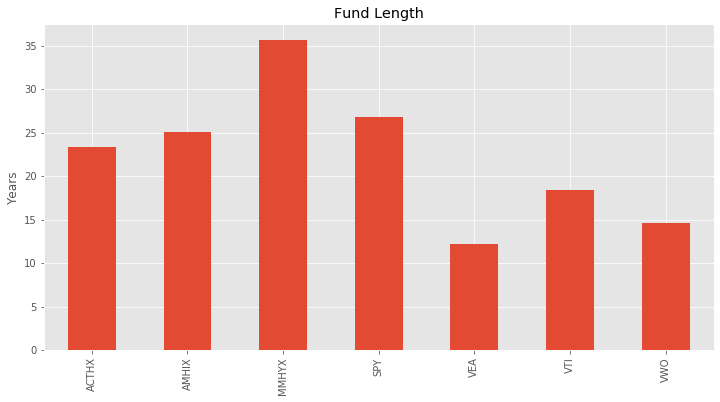

In [16]:
df_returns = pd.DataFrame({t: get_returns_p1(t) - 1. for t in tickers})
df_prices = pd.DataFrame({t: get_prices(t) for t in tickers})
ax = df_prices.apply(get_length).plot.bar(title='Fund Length')
ax.set_ylabel('Years');

In [17]:
compute_stats(df_returns.last('10Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
AMHIX,-0.092634,0.062036,0.025587,2.365323,0.669689
SPY,-0.193388,0.129137,0.148045,0.894745,0.667760
VTI,-0.203026,0.129070,0.151144,0.879092,0.635730
ACTHX,-0.111183,0.065904,0.031444,2.045759,0.592749
MMHYX,-0.105609,0.062552,0.027947,2.185261,0.592299
VEA,-0.259147,0.052624,0.178836,0.376524,0.203066
VWO,-0.358140,0.027815,0.205812,0.236381,0.077665


In [18]:
compute_stats(df_returns.last('15Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
MMHYX,-0.232974,0.051914,0.033719,1.518006,0.222831
AMHIX,-0.217516,0.047911,0.030326,1.558539,0.220266
ACTHX,-0.273187,0.053123,0.038558,1.361853,0.194455
VTI,-0.554525,0.087505,0.184801,0.546469,0.157802
SPY,-0.552014,0.085201,0.184309,0.535805,0.154346


In [19]:
compute_stats(df_returns.last('25Y').dropna(axis=1))

,max_drawdown,annual_return,annual_volatility,sharpe_ratio,calmar_ratio
AMHIX,-0.217516,0.054416,0.030472,1.754346,0.250172
MMHYX,-0.232974,0.056687,0.031833,1.748248,0.243317
SPY,-0.552014,0.099024,0.186732,0.599092,0.179387


# Correlation

In [20]:
df_returns.corr()

,ACTHX,AMHIX,MMHYX,SPY,VEA,VTI,VWO
ACTHX,1.000000,0.882716,0.871387,-0.099968,-0.126579,-0.125380,-0.102992
AMHIX,0.882716,1.000000,0.835108,-0.057703,-0.119191,-0.121962,-0.095519
MMHYX,0.871387,0.835108,1.000000,-0.047461,-0.096673,-0.110833,-0.076013
SPY,-0.099968,-0.057703,-0.047461,1.000000,0.899732,0.988299,0.855904
VEA,-0.126579,-0.119191,-0.096673,0.899732,1.000000,0.896850,0.883024
VTI,-0.125380,-0.121962,-0.110833,0.988299,0.896850,1.000000,0.855857
VWO,-0.102992,-0.095519,-0.076013,0.855904,0.883024,0.855857,1.000000


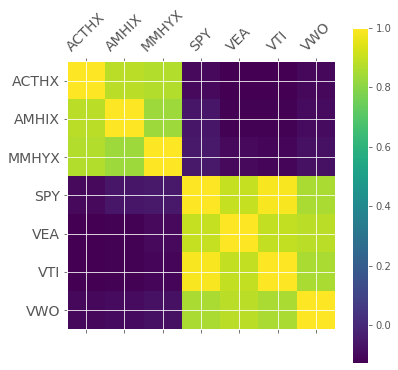

In [21]:
plt.matshow(df_returns.corr())
plt.xticks(range(len(df_returns.columns)), df_returns.columns, fontsize=14, rotation=45)
plt.yticks(range(len(df_returns.columns)), df_returns.columns, fontsize=14, )
cb = plt.colorbar()